In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/pumping/osmotic/'


In [89]:
eps = 1e-3
mu = 0.6105653703843762
theta = np.pi/3.
nu = theta / np.sin(theta)
print(nu, mu, np.sin(theta)**2/(2*theta-np.sin(2*theta)))

1.2091995761561452 0.6105653703843762 0.6105653703843762


In [90]:
Ltot = 12000
tauv, ell0, chiv, L0 = 1., 10., 50., 1.
xiv = chiv*ell0

In [4]:
def plot_osmotic(chis, chiv, path_list, plot_param_list, Nt_list, rescale = False) :
    label = False
    Nt_list[(chis, chiv)] = {}
    for n in range(nsim) :
        Nt_list[(chis, chiv)][n] = np.loadtxt(os.path.join(path_list[(chis, chiv)][n], 'sim_nlum.dat'))
        if label :
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
        else :
            label = True
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + r' ; $\chi_v = $' + str(chiv), alpha=1.)
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + r' ; $\chi_v = $' + str(chiv), alpha=plot_param_list[(chis, chiv)][4])
    return Nt_list[(chis, chiv)]



In [96]:
ca_dict = {0 : ['ca0', 'k'], 0.01 : ['ca1e-2', 'b'], 0.1 : ['ca1e-1', 'r'], 1 : ['ca1e0', 'purple'],10 : ['ca1e1', 'orange']}
# (chis, chiv) : marker, markersize, alpha, linewidth
lw = 1.
ms = 4
chi_dict = {#(5, 5) : ['^', ms, 1., lw],
            (1, 5) : ['^', ms, 1., lw],
            #(50, 50) : ['+', ms, 1., lw],
            (1, 50) : ['+', ms, 1., lw],
            #(500, 500) : ['o', ms, 1., lw],
            (1, 500) : ['o', ms, 1., lw],
           }
nsim = 20


In [102]:
Nt_N1000 = {}

for chi in chi_dict.keys() :
    print('chiv = ', chi[1], ' ; chis = ', chi[0])
    subdir = "N1000/chiv"+str(chi[1])+"_chis"+str(chi[0])
    Nt_N1000[chi] = {}
        
    for ca in ca_dict.keys() :
        try :
            Nt_N1000[chi][ca] = {}
            for n in range(nsim) :
                Nt_N1000[chi][ca][n] = np.loadtxt(join(main_dir, subdir, ca_dict[ca][0], 'run'+str(n).zfill(4), 'sim_nlum.dat'))
            print(str(ca) + ' done !')
                
        except :
            pass
            print(ca, ' skipped')
            #print(str(ca) + ' not in chis'+str(chi[0])+'_chiv'+str(chi[1]))
       



chiv =  5  ; chis =  1
0  skipped
0.01  skipped
0.1  skipped
1 done !
10  skipped
chiv =  50  ; chis =  1
0  skipped
0.01 done !
0.1 done !
1 done !
10 done !
chiv =  500  ; chis =  1
0  skipped
0.01  skipped
0.1  skipped
1 done !
10  skipped


(1, 5) 0
(1, 5) 0.01
(1, 5) 0.1
(1, 5) 10
(1, 50) 0
(1, 500) 0
(1, 500) 0.01
(1, 500) 0.1
(1, 500) 10


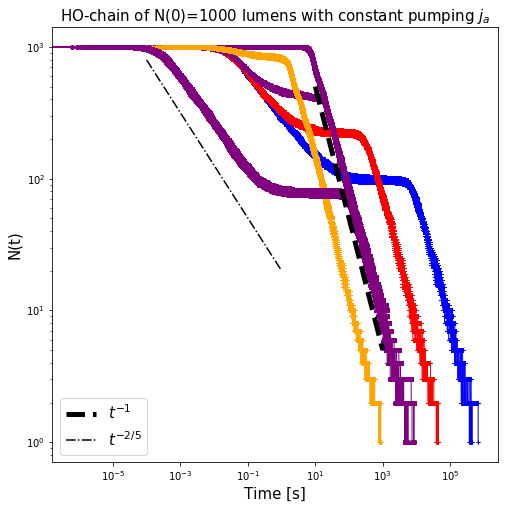

In [104]:
plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

rescaled = False

#for chi in chi_dict.keys() :
#for chi in [(5, 5), (50, 50),(500, 500), (1, 500)] :
for chi in [(1, 5), (1, 50), (1, 500)] :
    for ca in ca_dict.keys() :
        #if ca != 0 :
        try :
            for n in range(nsim) :
                if rescaled :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0]*chi[0]**2, Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3])
                else :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0], Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3])
        except :
            print(chi, ca)
            pass
        

if rescaled :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(2, 3, 101)
    t2 = np.logspace(-4, 0, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(-4, 0, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linewidth = 5, linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')

if rescaled :
    plt.xlabel('t/T', fontsize=15)
else :
    plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)
plt.title(r'HO-chain of N(0)=1000 lumens with constant pumping $j_a$', fontsize=15)
plt.legend(fontsize=15, loc=3)
#plt.savefig('coarsening_pumping_chis500_chiv500.png', format='png')
plt.show()


In [105]:
def gen_log_times(tmin, tmax, npts) :
    return np.logspace(np.log10(tmin), np.log10(tmax), npts)

def find_argmins(Nt, log_times) :
    index_array = np.zeros(len(log_times), dtype=int)
    for k in range(len(log_times)) :
        index_array[k] = np.argmin(np.abs(log_times[k]-Nt[:, 0]))
    return index_array

def gen_index_array(Nt, npts) :
    size = len(Nt)
    
    tmin = np.min(Nt[1:, 0])   # skip the first time since t=0
    tmax = np.max(Nt[1:, 0])   # skip the first time since t=0
    
    log_times = gen_log_times(tmin, tmax, npts)
    index_array = find_argmins(Nt, log_times)
    
    return index_array


In [106]:

def plot_conf(ca, chis, chiv, Nt, npts=20,  wmin=-6, wmax=3, rescaled=False, rescaled_pumping=False, ell0=10, L0=12000, tau=1, show_sim=False) :
    global chi_dict, ca_dict
    global mu, nu, eps
    chi = (chis, chiv)
    xiv = ell0*chiv
    T = (2*tau*L0**2)/((xiv**2)*mu*eps)
    if ca != 0 :
        T_ca = 1./(mu*nu*ca)
    else :
        print('No pumping!')
        T_ca = 1.
    if show_sim :
        for n in range(nsim) :
            index_array = gen_index_array(Nt[(chis, chiv)][ca][n], npts)
            if rescaled :
                plt.plot(Nt[(chis, chiv)][ca][n][index_array, 0]/T, Nt[(chis, chiv)][ca][n][index_array, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha = 0.1)
            elif rescaled_pumping :
                plt.plot(Nt[(chis, chiv)][ca][n][index_array, 0]/T_ca, Nt[(chis, chiv)][ca][n][index_array, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha = 0.1)
            else :
                plt.plot(Nt[(chis, chiv)][ca][n][index_array, 0], Nt[(chis, chiv)][ca][n][index_array, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=0.1)

    res_avg, res_std = an.batch(data_dict=Nt[(chis, chiv)][ca], wmin=wmin, wmax=wmax, nwindow=npts)
    if rescaled :
        plt.plot(res_avg[:, 0]/T, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$c^a = ' + str(ca) + '$')
    elif rescaled_pumping :
        plt.plot(res_avg[:, 0]/T_ca, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$c^a = ' + str(ca) + '$')
    else :
        plt.plot(res_avg[:, 0], res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$c^a = ' + str(ca) + '$')
    
    
def plot_osmotic_pumping(Nt, ca_bools, chi_bools, npts=50, rescaled = False, rescaled_pumping = False, show_sim=False, scaling_laws=True, savefig=False, savename='H0-coarsening_pumping.png', extension='png') :
    plt.figure(figsize=(6, 6))
    plt.xscale('log')
    plt.yscale('log')

    try :
        chis5_chiv5, chis50_chiv50, chis500_chiv500, chis5_chiv500 = chi_bools
    except :
        chis5_chiv5, chis50_chiv50, chis500_chiv500 = chi_bools
        chis_chiv500 = 0
        
    ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1 = ca_bools
    
    # chis, chiv = (5, 5)
    if chis1_chiv5 :
        chis, chiv = 1, 5
        # ca = 0.
        #plot_conf(ca=0., chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.01
        if ca_1e_2 :
            plot_conf(ca=0.01, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=6, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.1
        if ca_1e_1 :
            plot_conf(ca=0.1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=5, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 1
        if ca_1e0 :
            plot_conf(ca=1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 10
        if ca_1e1 :
            plot_conf(ca=10, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)

    # chis, chiv = (50, 50)
    if chis1_chiv50 :
        chis, chiv = 1, 50
        # ca = 0.
        #plot_conf(ca=0., chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.01
        if ca_1e_2 :
            plot_conf(ca=0.01, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=6, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.1
        if ca_1e_1 :
            plot_conf(ca=0.1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=5, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 1
        if ca_1e0 :
            plot_conf(ca=1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 10
        if ca_1e1 :
            plot_conf(ca=10, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)

    # chis, chiv = (500, 500)
    if chis1_chiv500 :
        chis, chiv = 1, 500
        # ca = 0.
        if ca_0 :
            plot_conf(ca=0., chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.01
        if ca_1e_2 :
            plot_conf(ca=0.01, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=6, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.1
        if ca_1e_1 :
            plot_conf(ca=0.1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=5, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 1
        if ca_1e0 :
            plot_conf(ca=1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 10
        if ca_1e1 :
            plot_conf(ca=10, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)

    if scaling_laws :
        coarsening_law = True
        merging_law = True

        if coarsening_law :
            if rescaled :
                k_c, alpha_c = 3000, -2./5
                t_c = np.logspace(0.5, 4, 101)
            else :
                k_c, alpha_c = 20., -2./5
                t_c = np.logspace(-3, 0, 101)
            plt.plot(t_c, k_c*t_c**alpha_c, linestyle='--', color = 'k', linewidth=2, label = r'$t^{-2/5}$')

        if merging_law :
            if rescaled :
                k_m, alpha_m = 200., -1.
                t_m = np.logspace(0, 2, 101)
            else :
                k_m, alpha_m = 50000., -1.
                t_m = np.logspace(1.7, 3.7, 101)
            plt.plot(t_m, k_m*t_m**alpha_m, linestyle='-.', color = 'k', linewidth=2, label = r'$t^{-1}$')

    plt.legend(fontsize=12, loc=3)
    if rescaled :
        plt.xlabel(r'$t / T_h$', fontsize=12)
    elif rescaled_pumping :
        plt.xlabel(r'$t/T_p$', fontsize=12)
    else :
        plt.xlabel(r'$t/\tau_v$', fontsize=12)

    plt.ylabel('N(t)', fontsize=12)
    plt.grid()
    plt.title('HO-chain with active pumping', fontsize=18)
    if savefig :
        plt.savefig(savename, format=extension)
    plt.show()
    

In [107]:
ca_dict = {0 : ['ca0', 'k'], 
           0.001 : ['ca1e-3', 'g'], 
           0.01 : ['ca1e-2', 'b'], 
           0.1 : ['ca1e-1', 'r'], 
           1 : ['ca1e0', 'purple'],
           10 : ['ca1e1', 'orange']
          }

# (chis, chiv) : marker, markersize, alpha, linewidth
lw = 1.
ms = 6
chi_dict = {#(5, 5) : ['^', ms, 1., lw],
            (1, 5) : ['^', ms, 1., lw],
            #(50, 50) : ['s', ms, 1., lw],
            (1, 50) : ['s', ms, 1., lw],
            #(500, 500) : ['o', ms, 1., lw],
            (1, 500) : ['o', ms, 1., lw],
           }
nsim = 20


In [108]:
rescaled = False
rescaled_pumping = True

rescaled = True
rescaled_pumping = False

show_sim = False
scaling_laws = True

npts = 50


# Same ratios, different pumpings

End of import !
End of import !
End of import !
End of import !


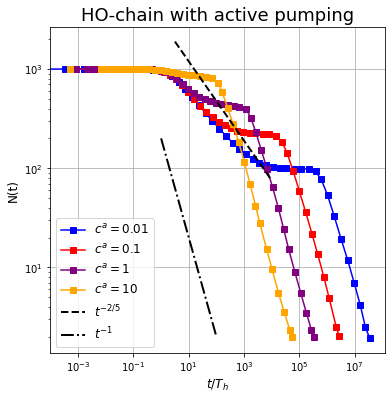

In [109]:
ca_0 = 0
ca_1e_2 = 1
ca_1e_1 = 1
ca_1e0 = 1
ca_1e1 = 1

chis5_chiv5 = 0
chis50_chiv50 = 0
chis500_chiv500 = 0

chis1_chiv5 = 0
chis1_chiv50 = 1
chis1_chiv500 = 0

rescaled = True
rescaled_pumping = False

chi_bools = [chis1_chiv5, chis1_chiv50, chis1_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

chis, chiv = 1, 500
savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_chis'+str(chis)+'_chiv'+str(chiv)+'_T-rescaled.eps'
#savefig = True
savefig=False

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws,
                     savename=savename, savefig=savefig,
                     extension='eps')


End of import !


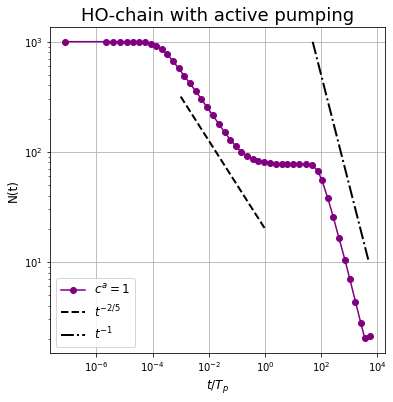

In [13]:
ca_0 = 0
ca_1e_2 = 0
ca_1e_1 = 0
ca_1e0 = 1
ca_1e1 = 0

chis1_chiv5 = 0
chis1_chiv50 = 0
chis1_chiv500 = 1

rescaled = False#True
rescaled_pumping = True#False

chis, chiv = 1, 500

chi_bools = [chis1_chiv5, chis1_chiv50, chis1_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_chis'+str(chis)+'_chiv'+str(chiv)+'_T-rescaled.eps'
#savefig = True
savefig=False

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws, 
                     savename=savename, savefig=savefig,
                     extension='eps')


End of import !


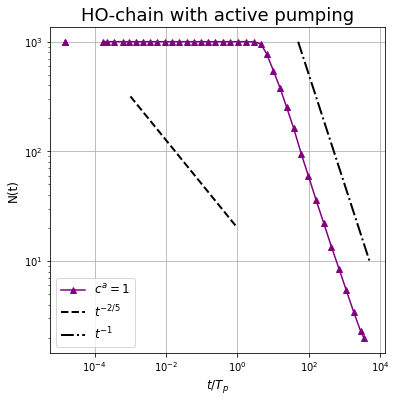

In [14]:
ca_0 = 0
ca_1e_2 = 0
ca_1e_1 = 0
ca_1e0 = 1
ca_1e1 = 0

chis1_chiv5 = 1
chis1_chiv50 = 0
chis1_chiv500 = 0

rescaled = False#True
rescaled_pumping = True#False

chis, chiv = 1, 500

chi_bools = [chis1_chiv5, chis1_chiv50, chis1_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_chis'+str(chis)+'_chiv'+str(chiv)+'_T-rescaled.eps'
#savefig = True
savefig=False

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws, 
                     savename=savename, savefig=savefig,
                     extension='eps')



# Same pumping, different ratios

End of import !
End of import !
End of import !


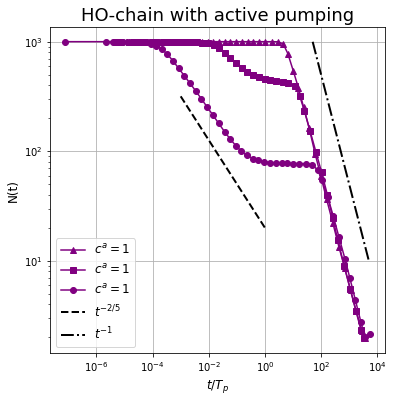

In [15]:
ca_0 = 0
ca_1e_2 = 0
ca_1e_1 = 0
ca_1e0 = 1
ca_1e1 = 0

chis1_chiv5 = 1
chis1_chiv50 = 1
chis1_chiv500 = 1

chi_bools = [chis1_chiv5, chis1_chiv50, chis1_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

rescaled = False
rescaled_pumping = True

savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_ca'+str(1)+'_ca-rescaled.eps'
savefig = False
#savefig=False

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws, 
                     savename=savename, savefig=savefig,
                     extension='eps')


In [65]:
def find_tstep(time_list, t0) :
    return np.argmin(np.abs(time_list - t0))

def calc_avg_distrib(X_dict, Y_dict) :
    X_array = np.array([X_dict[k] for k in X_dict.keys()])
    X_avg = np.average(X_array, axis=0)

    Y_array = np.array([Y_dict[k] for k in Y_dict.keys()])
    Y_avg = np.average(Y_array, axis=0)
    return X_avg, Y_avg



def make_T_dict(folder, npts, nsim=20, log_tmin=-3, log_tmax=7) :
    time_plot_list = np.logspace(log_tmin, log_tmax, npts)
    T_dict = {}
    #for k in [30] :
    for k in range(nsim) :
        k+=20
        T_dict[k] = np.loadtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), usecols=0)
    return T_dict, time_plot_list

def make_step_dict(T_dict, time_plot_list, npts, nsim) :
    step_dict = {}
    for n in range(npts) :
        step_dict[n] = {}
        for k in range(nsim) :
        #for k in [30] :
            k+=20
            step_dict[n][k] = np.argmin(np.abs(T_dict[k] - time_plot_list[n]))
    return step_dict

def calc_distrib(time, folder) :
    dat = {}
    for elem in os.listdir(folder) :
        if elem.startswith('run') :
            #print(elem, ' imported', end='\r')
            tdat = np.loadtxt(os.path.join(folder, elem, 'distrib_length.dat'), usecols=0)
            step = np.argmin(np.abs(tdat-time))
            Ldat = np.genfromtxt(os.path.join(folder, elem, 'distrib_length.dat'), skip_header=step, skip_footer=len(tdat)-step-1)
            dat[int(elem[-4:])] = [step, Ldat]
    
    new_L = np.concatenate([dat[k][1][1:] for k in dat.keys()])
    bins = np.max([10, 10+int(np.log10(len(new_L)))*7])
    
    y, x = np.histogram(new_L, bins=bins, weights=np.ones_like(new_L)/len(new_L))
    x = 0.5*(x[1:]+x[:-1])
    distrib = [x, y]
    return distrib


In [63]:
NT_p = {}
#chis, chiv = 50, 50
chis, chiv = 1, 50
#for ca in ['1e-2', '1e-1', '1e0', '1e1'] :
for ca in ['1e-2'] :
    print('ca : ', ca, ' running...', end='\n')
    NT_p[ca] = {}
    if ca != 10 :
        for n in range(20) :
            filename = os.path.join(main_dir, 'N1000', 'chiv'+str(chiv)+'_chis'+str(chis), 'ca'+ca, 'run'+str(n).zfill(4), 'sim_nlum.dat')
            NT_p[ca][n] = np.loadtxt(filename)
            
    else :
        for n in range(40) :
            NT_p[ca][n] = np.loadtxt(filename)
    print('ca : ', ca, ' done', end='\n')
    

ca :  1e-2  running...
ca :  1e-2  done


End of import !


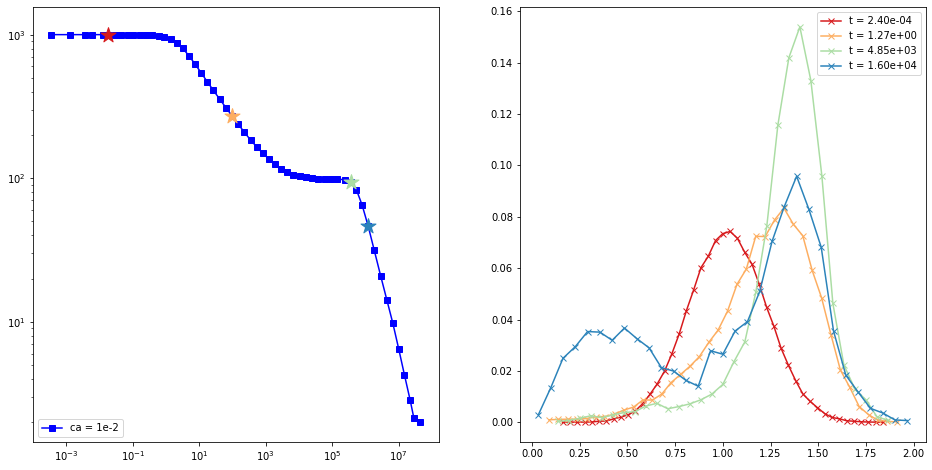

In [91]:
wmin_dict = {'1e-2' : -5, '1e-1' : -5, '1e0' : -5, '1e1' : -5}
wmax_dict = {'1e-2' : 6, '1e-1' : 5, '1e0' : 4, '1e1' : 3}
npts = 60

#steps = [10, 20, 27, 30]
steps = [5, 25, 44, 47]
col_steps = {steps[0] : '#d7191c', 
             steps[1] : '#fdae61', 
             steps[2] : '#abdda4', 
             steps[3] : '#2b83ba', 
             #steps[4] : '#F27FBE',
            }

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].set_xscale('log')
ax[0].set_yscale('log')

ca = '1e-2'
chiv, chis = 50, 1
folder = os.path.join(main_dir, 'N1000', 'chiv'+str(50)+'_chis'+str(chis), 'ca'+ca)
show_sim = False

#for ca in ['1e-2', '1e-1', '1e0', '1e1'] :
for ca in [ca] :
    wmin, wmax = wmin_dict[ca], wmax_dict[ca]
    T = (2*tauv*L0**2)/((xiv**2)*mu*eps)
    #T=1
    index_array = gen_index_array(NT_p[ca][0], npts)
    res_avg, res_std = an.batch(data_dict=NT_p[ca], wmin=wmin, wmax=wmax, nwindow=npts)
    #print(res_avg)
    ax[0].plot(res_avg[:, 0]/T, res_avg[:, 1], marker='s', color = ca_dict[float(ca)][1], label = 'ca = '+str(ca))
    if ca == '1e-2' :
        for s in steps :
            ax[0].scatter(res_avg[s, 0]/T, res_avg[s, 1], color=col_steps[s], zorder=10, marker='*', s=250)
            if os.path.isfile('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt') :
                distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt')
            else :
                #print('Calculating distribution at step ', s, end='\r')
                distrib = calc_distrib(time = res_avg[s, 0], folder=folder)
                np.savetxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt', distrib)
            ax[1].plot(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), marker='x', color=col_steps[s])
            #ax[1].(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), marker='x', color=col_steps[s])
            
            if show_sim :
                for k in NT_p[ca].keys() :
                    ax[0].plot(NT_p[ca][k][:, 0]/T, NT_p[ca][k][:, 1], color=ca_dict[float(ca)][1], alpha=0.1)
            
    np.savetxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'.txt', res_avg)
    

ax[1].legend()
ax[0].legend(loc=3)
 
#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/pumping_distributions.eps', format='eps')



In [87]:
def g(z, C=27./10., zmax=9./4) :
    return (5*C-8*z**1.)/(4*z**2.5+10*C*z*(1-np.sqrt(z)))

def h(z, C=-4, zmax=2.) :
    return (3+C/(z**2))/(C*(1/z - 1.) - z)
    
    
def calc_fz(z, dz, z0=1e-6) :    
    sol = [z0]
    for i in range(1, len(z)) :
        #sol += [sol[i-1] + dz*g(z[i-1])*sol[i-1]]
        sol += [sol[i-1] + dz*h(z[i-1])*sol[i-1]]
    
    Z = np.sum(sol)
    sol = np.array(sol) / Z
    return sol

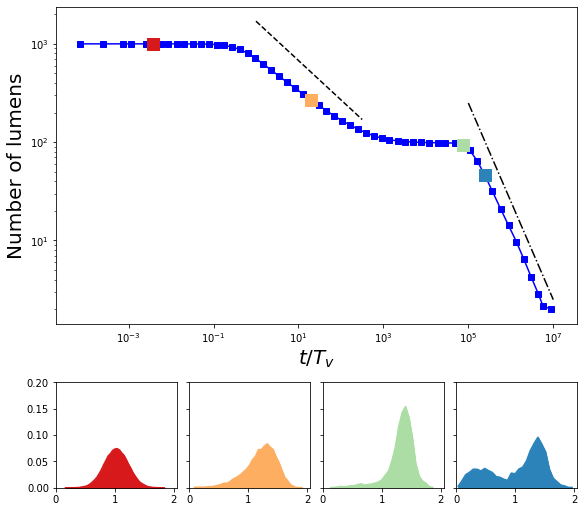

In [95]:
from matplotlib.gridspec import GridSpec


fig = plt.figure(constrained_layout=True, figsize=(8, 7))
#fig = plt.figure(figsize=(8, 6))
#fig.tight_layout(pad=100.0)

gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
ax3.set_yticklabels([])
ax4 = fig.add_subplot(gs[-1, 2])
ax4.set_yticklabels([])
ax5 = fig.add_subplot(gs[-1, 3])
ax5.set_yticklabels([])
ax_steps = [ax2, ax3, ax4, ax5]

#fig.suptitle("GridSpec")
#format_axes(fig)
Tv = tauv*L0/(mu*eps*ell0*chiv**2)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(res_avg[:, 0]/Tv, res_avg[:, 1], marker='s', color = ca_dict[float(ca)][1], label = 'ca = '+str(ca))
a1, k1, t1 = -2/5., 1700., np.logspace(0, 2.5, 101)
a2, k2, t2 = -1., 25000000., np.logspace(5, 7, 101)
ax1.plot(t1, k1*t1**a1, color='k', linestyle='--')
ax1.plot(t2, k2*t2**a2, color='k', linestyle='-.')
ax1.set_xlabel(r'$t/T_v$', fontsize=20)
ax1.set_ylabel(r'Number of lumens', fontsize=20)
#ax1.grid()

i=0
chiv, chis = 50, 1
ca = '1e-2'
for s in steps :
    ax1.scatter(res_avg[s, 0]/Tv, res_avg[s, 1], color=col_steps[s], zorder=10, marker='s', s=150)
    distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt')
    ax_steps[i].plot(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), color=col_steps[s])
    ax_steps[i].fill_between(distrib[0]/np.average(distrib[0]), 0., distrib[1], color=col_steps[s])
    ax_steps[i].set_xlim(0., 2.05)
    ax_steps[i].set_ylim(0., 0.2)
    i += 1
    
plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/pumping_distributions.eps')
plt.show()


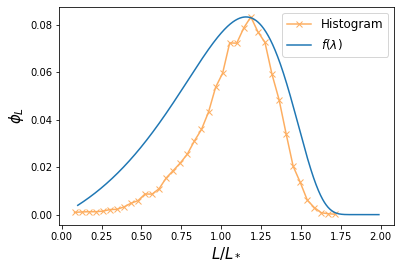

In [80]:
z = np.linspace(0.1, 1.99, 1001)
dz = z[1]-z[0]
sol = calc_fz(z, dz=dz)
gamma = np.sum(sol*z**2)

s = steps[1]
distrib = np.loadtxt('Nt_avg_chiv50_chis1_ca'+ca+'_step'+str(s)+'.txt')
plt.plot(distrib[0]/(gamma*np.average(distrib[0])), distrib[1], marker='x', color=col_steps[s], label = 'Histogram')
plt.plot(z, sol/np.max(sol)*np.max(distrib[1]), label = r'$f(\lambda)$')


plt.xlabel(r'$L / L_*$', fontsize=15)
plt.ylabel(r'$\phi_L$', fontsize=15)
plt.legend(fontsize=12)

plt.title('', fontsize=12)
plt.show()

End of import !
End of import !
End of import !


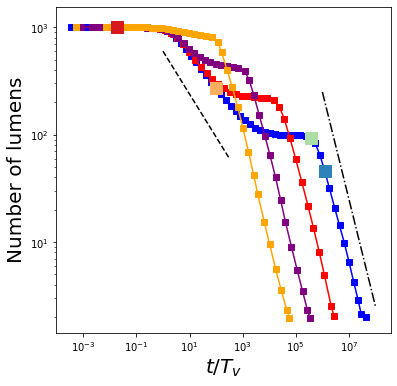

In [130]:
from matplotlib.gridspec import GridSpec


plt.figure(figsize=(6, 6))
#fig = plt.figure(figsize=(8, 6))
#fig.tight_layout(pad=100.0)

#gs = GridSpec(4, 4, figure=fig)
#ax1 = fig.add_subplot(gs[:-1, :])
#ax2 = fig.add_subplot(gs[-1, 0])
#ax3 = fig.add_subplot(gs[-1, 1])
#ax3.set_yticklabels([])
#ax4 = fig.add_subplot(gs[-1, 2])
#ax4.set_yticklabels([])
#ax5 = fig.add_subplot(gs[-1, 3])
#ax5.set_yticklabels([])
#ax_steps = [ax2, ax3, ax4, ax5]

#fig.suptitle("GridSpec")
#format_axes(fig)
#Tv = tauv*L0/(mu*eps*ell0*chiv**2)
Tv = (2*tau*L0**2)/((xiv**2)*mu*eps)

plt.xscale('log')
plt.yscale('log')
plt.plot(res_avg[:, 0]/Tv, res_avg[:, 1], marker='s', color = ca_dict[float(ca)][1], label = 'ca = '+str(ca))
a1, k1, t1 = -2/5., 600., np.logspace(0, 2.5, 101)
a2, k2, t2 = -1., 250000000., np.logspace(6, 8, 101)
plt.plot(t1, k1*t1**a1, color='k', linestyle='--')
plt.plot(t2, k2*t2**a2, color='k', linestyle='-.')
plt.xlabel(r'$t/T_v$', fontsize=20)
plt.ylabel(r'Number of lumens', fontsize=20)
#ax1.grid()

i=0
chiv, chis = 50, 1
ca = '1e-2'
for s in steps :
    plt.scatter(res_avg[s, 0]/Tv, res_avg[s, 1], color=col_steps[s], zorder=10, marker='s', s=150)
    distrib = np.loadtxt('Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_ca'+ca+'_step'+str(s)+'.txt')
    #ax_steps[i].plot(distrib[0]/np.average(distrib[0]), distrib[1], label='t = ' +"{:2.2e}".format(res_avg[s, 0]), color=col_steps[s])
    #ax_steps[i].fill_between(distrib[0]/np.average(distrib[0]), 0., distrib[1], color=col_steps[s])
    #ax_steps[i].set_xlim(0., 2.05)
    #ax_steps[i].set_ylim(0., 0.2)
    #i += 1
    
rescaled, rescaled_pumping = True, False
if chis1_chiv50 :
    chis, chiv = 1, 50
        # ca = 0.
        #plot_conf(ca=0., chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.01
    #if ca_1e_2 :
    #    plot_conf(ca=0.01, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=6, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.1
    if ca_1e_1 :
        plot_conf(ca=0.1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=5, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 1
    if ca_1e0 :
        plot_conf(ca=1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 10
    if ca_1e1 :
        plot_conf(ca=10, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)

plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/pumping_distributions.eps')
plt.show()



In [131]:
L0

1.0